In [11]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Load cleaned dataset
df = pd.read_csv("cleaned_insurance_data.csv")

3. **Analyse univariée :** Analysez chaque variable indépendamment.

- Age

In [13]:
# Descriptive statistics
round(df['age'].describe(), 2)

count    1337.00
mean       39.22
std        14.04
min        18.00
25%        27.00
50%        39.00
75%        51.00
max        64.00
Name: age, dtype: float64

In [14]:
# Descriptive statistics (Median)
df['age'].median() 

np.float64(39.0)

In [15]:
# Descriptive statistics (Mode)
df['age'].mode() 

0    18
Name: age, dtype: int64

Text(64.72222222222221, 0.5, 'Frequency')

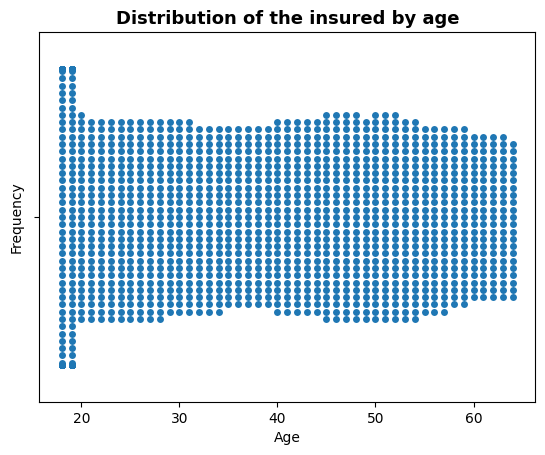

In [16]:
# Confirm modality with swarmplot
sns.swarmplot(data=df, x="age")
plt.title("Distribution of the insured by age", fontsize= 13, weight = "bold")
plt.xlabel("Age", weight = 10)
plt.ylabel("Frequency", weight = 10)

Text(-8.055555555555555, 0.5, 'Frequency')

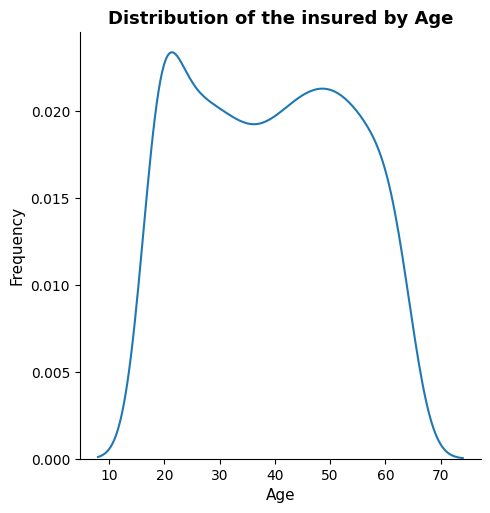

In [17]:
# Plot distribution
sns.displot(df, x = 'age', kind='kde')
plt.title("Distribution of the insured by Age", fontsize= 13, weight = "bold")
plt.xlabel("Age", fontsize= 11, weight = 10)
plt.ylabel("Frequency", fontsize= 11, weight = 10)

In [18]:
# Descriptive statistics (Range)
age_range = df['age'].max() - df['age'].min()

age_range

np.int64(46)

In [19]:
# Descriptive statistics (Co-efficient of Variation)
cov_age = df['age'].std() / df['age'].mean()

# Convert to percentage
cov_age = round(cov_age,2) * 100

cov_age

np.float64(36.0)

- Sex

In [20]:
# Number of males and females insured
number_of_insured_by_sex = df['sex'].value_counts()

number_of_insured_by_sex

sex
1    675
0    662
Name: count, dtype: int64

In [21]:
# Create dataframe for pie chart
pie_df = pd.DataFrame(number_of_insured_by_sex).reset_index()
pie_df['sex'] = pie_df['sex'].map({1 : "Male", 0 : "Female"})
pie_df['percentage'] = pie_df['count'] / pie_df['count'].sum() * 100

pie_df

,sex,count,percentage
0,Male,675,50.486163
1,Female,662,49.513837


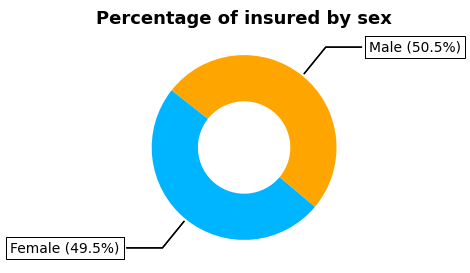

In [145]:
colors = sns.color_palette("hsv", 8)  
sns.set_palette(colors)

# Pie chart showing the percentage ratio of males to females
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(pie_df['count'], wedgeprops=dict(width=0.5), startangle=-40, colors=[colors[0], colors[4]])

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(pie_df['sex'][i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

    label = f"{pie_df['sex'][i]} ({pie_df['percentage'][i]:.1f}%)"
    ax.annotate(
        label, 
        xy=(x, y), 
        xytext=(1.35 * np.sign(x), 1.4 * y),
        horizontalalignment=horizontalalignment, 
        **kw
    )

ax.set_title("Percentage of insured by sex", fontsize=13, weight="bold")

plt.show()

- BMI

In [23]:
# Descriptive statistics
round(df['bmi'].describe(), 2)

count    1337.00
mean       30.66
std         6.10
min        15.96
25%        26.29
50%        30.40
75%        34.70
max        53.13
Name: bmi, dtype: float64

In [24]:
# Descriptive statistics (Median)
df['bmi'].median() 


np.float64(30.4)

In [25]:
# Descriptive statistics (Mode)
df['bmi'].mode() 

0    32.3
Name: bmi, dtype: float64

Text(0.6944444444444446, 0.5, 'Frequency')

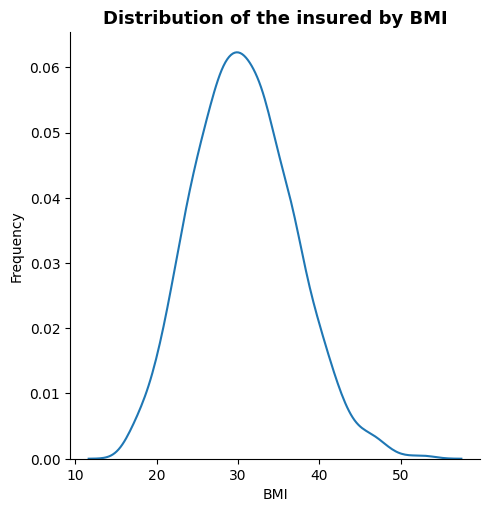

In [26]:
# Plot distribution
sns.displot(df, x = 'bmi', kind='kde')
plt.title("Distribution of the insured by BMI", fontsize= 13, weight = "bold")
plt.xlabel("BMI", weight = 10)
plt.ylabel("Frequency", weight = 10)

In [27]:
# Descriptive statistics (Range)
bmi_range = df['bmi'].max() - df['bmi'].min()

In [28]:
# Descriptive statistics (Co-efficient of Variation)
cov_bmi = df['bmi'].std() / df['bmi'].mean()

# Convert to percentage
cov_bmi = round(cov_bmi, 2) * 100

cov_bmi

np.float64(20.0)

- Children

In [29]:
# Descriptive statistics
round(df['children'].describe(), 2)

count    1337.00
mean        1.10
std         1.21
min         0.00
25%         0.00
50%         1.00
75%         2.00
max         5.00
Name: children, dtype: float64

In [30]:
# Descriptive statistics (Median)
df['children'].median() 

np.float64(1.0)

In [31]:
# Descriptive statistics (Mode)
df['children'].mode() 

0    0
Name: children, dtype: int64

Text(5.069444444444445, 0.5, 'Frequency')

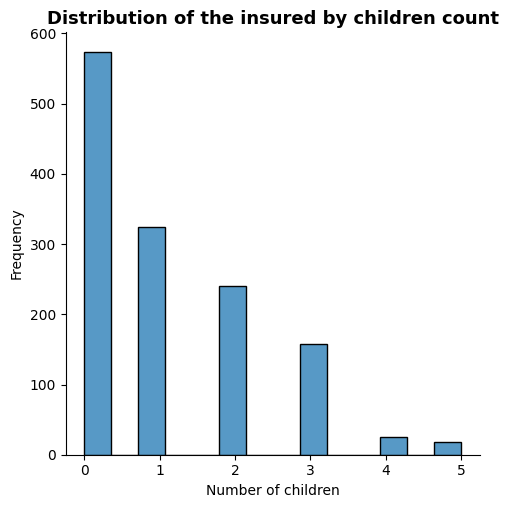

In [32]:
# Plot distribution
sns.displot(df, x = 'children', kind='hist')
plt.title("Distribution of the insured by children count", fontsize= 13, weight = "bold")
plt.xlabel("Number of children", weight = 10)
plt.ylabel("Frequency", weight = 10)

In [33]:
# Descriptive statistics (Range)
children_no_range = df['children'].max() - df['children'].min()

children_no_range

np.int64(5)

In [34]:
# Descriptive statistics (Co-efficient of Variation)
cov_children = df['children'].std() / df['children'].mean()

# Convert to percentage
cov_children = round(cov_children, 2) * 100

cov_children

np.float64(110.00000000000001)

In [35]:
# Number of children insured
number_of_children_by_insured = df['children'].value_counts()

number_of_children_by_insured

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [36]:
# Create dataframe for pie chart
pie_df_children = pd.DataFrame(number_of_children_by_insured).reset_index()
pie_df_children['percentage'] = round(pie_df_children['count'] / pie_df_children['count'].sum() * 100, 2)
shuffled_pie_df_children = pie_df_children.sample(frac=1, random_state=75).reset_index(drop=True)

shuffled_pie_df_children

,children,count,percentage
0,2,240,17.95
1,4,25,1.87
2,1,324,24.23
3,3,157,11.74
4,5,18,1.35
5,0,573,42.86


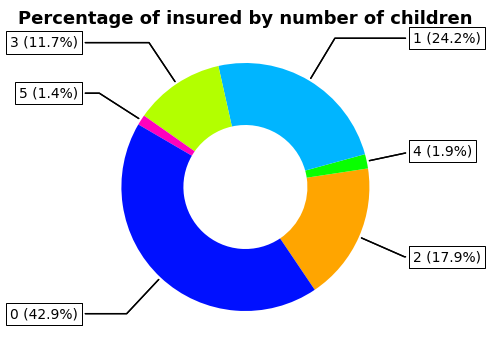

In [148]:
# Pie chart showing the percentage ratio by number of children
fig, ax = plt.subplots(figsize=(4, 7), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(shuffled_pie_df_children['count'], wedgeprops=dict(width=0.5), startangle=-56, colors= [colors[0], colors[2],colors[4], colors[1], colors[7], colors[5],])

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(shuffled_pie_df_children['children'][i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

    label = f"{shuffled_pie_df_children['children'][i]} ({shuffled_pie_df_children['percentage'][i]:.1f}%)"
    ax.annotate(
        label, 
        xy=(x, y), 
        xytext=(1.35 * np.sign(x), 1.4 * y),
        horizontalalignment=horizontalalignment, 
        **kw
    )

ax.set_title("Percentage of insured by number of children", fontsize = 13, weight = "bold")

plt.show()

- Smokers

In [38]:
# Number of smokers vs non-smokers insured
number_of_insured_by_smoking_habit = df['smoker'].value_counts()

number_of_insured_by_smoking_habit

smoker
0    1063
1     274
Name: count, dtype: int64

In [39]:
# Create dataframe for pie chart
pie_df_smoker = pd.DataFrame(number_of_insured_by_smoking_habit).reset_index()
pie_df_smoker['smoker'] = pie_df_smoker['smoker'].map({ 1 : "Smoker", 0 : "Non-smoker"})
pie_df_smoker['percentage'] = pie_df_smoker['count'] / pie_df_smoker['count'].sum() * 100

pie_df_smoker

,smoker,count,percentage
0,Non-smoker,1063,79.506358
1,Smoker,274,20.493642


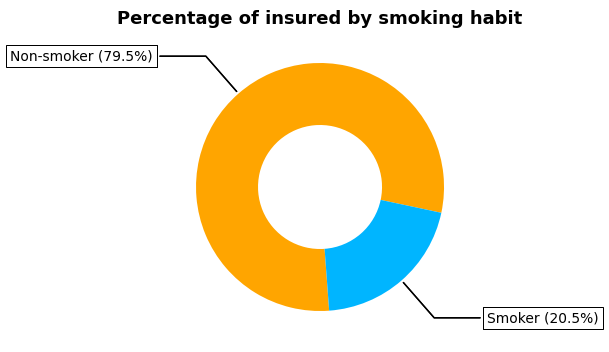

In [149]:
# Pie chart showing the percentage ratio by number of children
fig, ax = plt.subplots(figsize=(4, 7), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(pie_df_smoker['count'], wedgeprops=dict(width=0.5), startangle=-12, colors=[colors[0], colors[4]])

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(pie_df_smoker['smoker'][i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

    label = f"{pie_df_smoker['smoker'][i]} ({pie_df_smoker['percentage'][i]:.1f}%)"
    ax.annotate(
        label, 
        xy=(x, y), 
        xytext=(1.35 * np.sign(x), 1.4 * y),
        horizontalalignment=horizontalalignment, 
        **kw
    )

ax.set_title("Percentage of insured by smoking habit", fontsize = 13, weight = "bold")

plt.show()

- Region

In [41]:
# Confirm the number of regions in dataset
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [42]:
# Number of smokers vs non-smokers insured
number_of_insured_by_region = df['region'].value_counts()

number_of_insured_by_region

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [43]:
# Create dataframe for pie chart
pie_df_region = pd.DataFrame(number_of_insured_by_region).reset_index()
pie_df_region['percentage'] = pie_df_region['count'] / pie_df_region['count'].sum() * 100

pie_df_region

,region,count,percentage
0,southeast,364,27.225131
1,southwest,325,24.308153
2,northwest,324,24.233358
3,northeast,324,24.233358


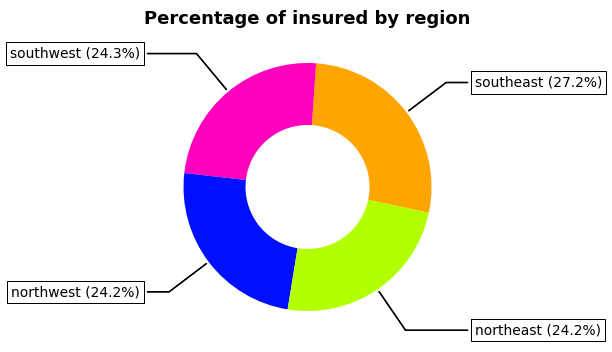

In [ ]:
# Pie chart showing the percentage ratio of the insured by region
fig, ax = plt.subplots(figsize=(4, 7), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(pie_df_region['count'], wedgeprops=dict(width=0.5), startangle=-12, colors= [colors[0], colors[7], colors[5], colors[1]])

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(pie_df_region['region'][i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

    label = f"{pie_df_region['region'][i]} ({pie_df_region['percentage'][i]:.1f}%)"
    ax.annotate(
        label, 
        xy=(x, y), 
        xytext=(1.35 * np.sign(x), 1.4 * y),
        horizontalalignment=horizontalalignment, 
        **kw
    )

ax.set_title("Percentage of insured by region", fontsize = 13, weight = "bold")

plt.show()

- Charge

In [45]:
# Descriptive statistics
round(df['charges'].describe(), 2)

count     1337.00
mean     13279.12
std      12110.36
min       1121.87
25%       4746.34
50%       9386.16
75%      16657.72
max      63770.43
Name: charges, dtype: float64

In [46]:
# Descriptive statistics (Median)
round(df['charges'].median(), 2)

np.float64(9386.16)

In [47]:
for i in range(0,10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [48]:
# Descriptive statistics (Mode)
round(df['charges'].mode(), 2)

0        1121.87
1        1131.51
2        1135.94
3        1136.40
4        1137.01
          ...   
1332    55135.40
1333    58571.07
1334    60021.40
1335    62592.87
1336    63770.43
Name: charges, Length: 1337, dtype: float64

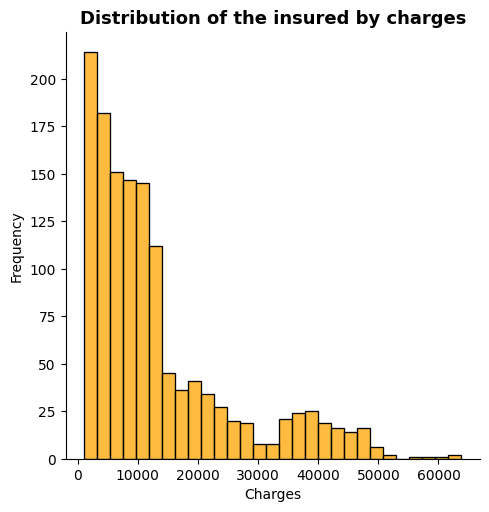

In [ ]:
# Plot distribution
sns.displot(df, x = 'charges', kind='hist')
plt.title("Distribution of the insured by charges", fontsize= 13, weight = "bold")
plt.xlabel("Charges", weight = 10)
plt.ylabel("Frequency", weight = 10)

In [50]:
# Descriptive statistics (Range)
round(df['charges'].max() - df['charges'].min(), 2)

np.float64(62648.56)

In [51]:
# Descriptive statistics (Co-efficient of Variation)
cov_charges = df['charges'].std() / df['charges'].mean()

# Convert to percentage
cov_charges = round(cov_charges, 2) * 100

cov_charges

np.float64(91.0)

In [52]:
# Display Co-efficient of Variation for numerical paramaters as DataFrame
# Aggregate CoVs
cov_outputs = [cov_age, cov_bmi, cov_children, cov_charges]

# Create dataframe
df_cov_plot = pd.DataFrame({"Parameters" : ["Age", "BMI", "Children", "Charges"], "CoV": cov_outputs})

df_cov_plot

,Parameters,CoV
0,Age,36.0
1,BMI,20.0
2,Children,110.0
3,Charges,91.0


Text(0, 0.5, 'CoV (%)')

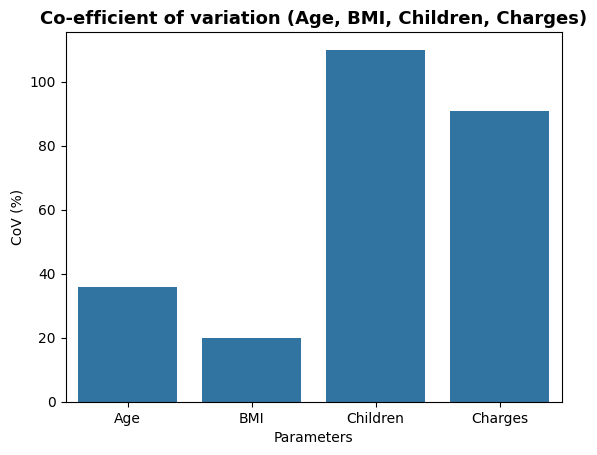

In [53]:
# Plot CoVs for comparison
sns.barplot(data=df_cov_plot, x = 'Parameters', y = 'CoV')
plt.title("Co-efficient of variation (Age, BMI, Children, Charges)", fontsize= 13, weight = "bold")
plt.xlabel("Parameters", weight = 10)
plt.ylabel("CoV (%)", weight = 10)

4. **Corrélation des variables :** Étudiez les corrélations avec la variable cible.

In [54]:
# Duplicate dataframe
df_for_cor = df.copy()

In [55]:
# One Hot encode "region" column
df_for_cor['is_southwest'] = df_for_cor['region'].apply(lambda x: 1 if x == "southwest" else 0)
df_for_cor['is_southeast'] = df_for_cor['region'].apply(lambda x: 1 if x == "southeast" else 0)
df_for_cor['is_northwest'] = df_for_cor['region'].apply(lambda x: 1 if x == "northwest" else 0)
df_for_cor['is_northeast'] = df_for_cor['region'].apply(lambda x: 1 if x == "northeast" else 0)

In [56]:
# Create BMI categories
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif 18.5 <= bmi < 25:
        return 'normal_weight'
    elif 25 <= bmi < 30:
        return 'overweight'
    else:
        return 'obese'

df_for_cor['bmi_category'] = df_for_cor['bmi'].apply(categorize_bmi)

In [57]:
# One Hot encode "bmi" column
df_for_cor['is_underweight'] = df_for_cor['bmi_category'].apply(lambda x: 1 if x == "underweight" else 0)
df_for_cor['is_normal_weight'] = df_for_cor['bmi_category'].apply(lambda x: 1 if x == "normal_weight" else 0)
df_for_cor['is_overweight'] = df_for_cor['bmi_category'].apply(lambda x: 1 if x == "overweight" else 0)
df_for_cor['is_obese'] = df_for_cor['bmi_category'].apply(lambda x: 1 if x == "obese" else 0)

In [58]:
# Drop dataframe index
df_for_cor.drop('Unnamed: 0', inplace=True, axis=1)

df_for_cor

,age,sex,bmi,children,smoker,region,charges,is_southwest,is_southeast,is_northwest,is_northeast,bmi_category,is_underweight,is_normal_weight,is_overweight,is_obese
0,19,0,27.90,0,1,southwest,16884.92,1,0,0,0,overweight,0,0,1,0
1,18,1,33.77,1,0,southeast,1725.55,0,1,0,0,obese,0,0,0,1
2,28,1,33.00,3,0,southeast,4449.46,0,1,0,0,obese,0,0,0,1
3,33,1,22.70,0,0,northwest,21984.47,0,0,1,0,normal_weight,0,1,0,0
4,32,1,28.88,0,0,northwest,3866.86,0,0,1,0,overweight,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,50,1,30.97,3,0,northwest,10600.55,0,0,1,0,obese,0,0,0,1
1333,18,0,31.92,0,0,northeast,2205.98,0,0,0,1,obese,0,0,0,1
1334,18,0,36.85,0,0,southeast,1629.83,0,1,0,0,obese,0,0,0,1
1335,21,0,25.80,0,0,southwest,2007.94,1,0,0,0,overweight,0,0,1,0


In [59]:
# Log-transform charges and age data (positively-skewed)
df_for_cor['bmi_log'] = df_for_cor['bmi'].apply(lambda x: np.log(x + 1))
df_for_cor['charges_log'] = df_for_cor['charges'].apply(lambda x: np.log(x + 1))
df_for_cor['age_log'] = df_for_cor['age'].apply(lambda x: np.log(x + 1))
df_for_cor['children_log'] = df_for_cor['children'].apply(lambda x: np.log(x + 1))
df_for_cor['smoker_log'] = df_for_cor['smoker'].apply(lambda x: np.log(x + 1))

df_for_cor

,age,sex,bmi,children,smoker,region,charges,is_southwest,is_southeast,is_northwest,...,bmi_category,is_underweight,is_normal_weight,is_overweight,is_obese,bmi_log,charges_log,age_log,children_log,smoker_log
0,19,0,27.90,0,1,southwest,16884.92,1,0,0,...,overweight,0,0,1,0,3.363842,9.734235,2.995732,0.000000,0.693147
1,18,1,33.77,1,0,southeast,1725.55,0,1,0,...,obese,0,0,0,1,3.548755,7.453880,2.944439,0.693147,0.000000
2,28,1,33.00,3,0,southeast,4449.46,0,1,0,...,obese,0,0,0,1,3.526361,8.400763,3.367296,1.386294,0.000000
3,33,1,22.70,0,0,northwest,21984.47,0,0,1,...,normal_weight,0,1,0,0,3.165475,9.998137,3.526361,0.000000,0.000000
4,32,1,28.88,0,0,northwest,3866.86,0,0,1,...,overweight,0,0,1,0,3.397189,8.260457,3.496508,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,50,1,30.97,3,0,northwest,10600.55,0,0,1,...,obese,0,0,0,1,3.464798,9.268755,3.931826,1.386294,0.000000
1333,18,0,31.92,0,0,northeast,2205.98,0,0,0,...,obese,0,0,0,1,3.494080,7.699380,2.944439,0.000000,0.000000
1334,18,0,36.85,0,0,southeast,1629.83,0,1,0,...,obese,0,0,0,1,3.633631,7.396844,2.944439,0.000000,0.000000
1335,21,0,25.80,0,0,southwest,2007.94,1,0,0,...,overweight,0,0,1,0,3.288402,7.605362,3.091042,0.000000,0.000000


In [60]:
# Standardize numerical data
df_for_cor['bmi_std'] = (df_for_cor['bmi'] - df_for_cor['bmi'].mean())/ df_for_cor['bmi'].std()
df_for_cor['charges_std'] = (df_for_cor['charges'] - df_for_cor['charges'].mean())/ df_for_cor['charges'].std()
df_for_cor['age_std'] = (df_for_cor['age'] - df_for_cor['age'].mean())/ df_for_cor['age'].std()
df_for_cor['children_std'] = (df_for_cor['children'] - df_for_cor['children'].mean())/ df_for_cor['children'].std()

In [61]:
# Define numerical and binary categorical data
numerical_columns = ['bmi_std', 'age_std', 'children_std', 'charges_std',
                     'bmi_log', 'age_log', 'children_log', 'charges_log']
binary_columns = ['sex', 'smoker', 'is_underweight', 'is_normal_weight',
                  'is_overweight', 'is_obese', 'is_southwest', 'is_southeast', 'is_northwest', 'is_northeast']

# Compute Pearson correlations for numerical data
pearson_corr = df_for_cor[numerical_columns].corr()

# Compute Point Biserial correlations for binary vs numerical
from scipy.stats import pointbiserialr

biserial_corr = pd.DataFrame(
    [[pointbiserialr(df_for_cor[cat], df_for_cor[num])[0] for num in numerical_columns] for cat in binary_columns],
    index=binary_columns, columns=numerical_columns
)

# Transpose biserial_corr to append correctly
biserial_corr_t = biserial_corr.T

# Combine numerical vs numerical and binary vs numerical correlations
combined_corr = pd.concat([pearson_corr, biserial_corr_t], axis=1)
combined_corr = pd.concat([combined_corr, biserial_corr], axis=0)

# Fill diagonal with 1.0 (self-correlation)
for col in combined_corr.columns:
    if col in combined_corr.index:
        combined_corr.loc[col, col] = 1.0

# Combine numerical vs numerical and binary vs numerical correlations
combined_corr = pd.concat([pearson_corr, biserial_corr_t], axis=1)
combined_corr = pd.concat([combined_corr, biserial_corr], axis=0)


In [62]:
# Compute Pearson correlations for categorical data
binary_corr_matrix = df_for_cor[binary_columns].corr(method='pearson')

# Create dataframe
binary_corr_matrix_df = pd.DataFrame(binary_corr_matrix)

In [63]:
# Fill NaNs with their respective correlation coefficients
combined_corr.fillna(binary_corr_matrix_df, inplace=True)

In [64]:
# Drop any other column with NaNs
combined_corr.dropna(inplace=True, axis = 1)

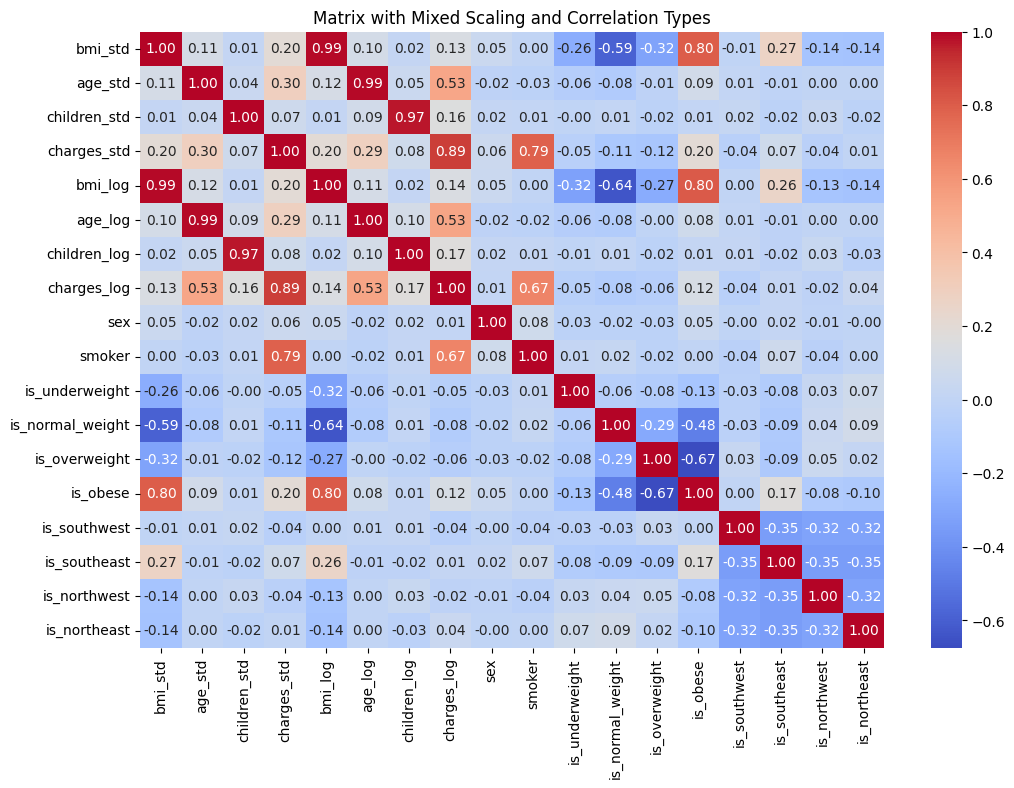

In [102]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(combined_corr, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=True, yticklabels=True)
plt.title("Matrix with Mixed Scaling and Correlation Types")
# Save figure
plt.savefig("Correlation_matrix.png", dpi=300, bbox_inches='tight') 
plt.show()

5. **Analyse bivariée :** Exemple : interaction entre sexe et fumeur.

In [66]:
# Duplicate latest dataframe with newly additional columns
df_for_bivariate_analysis = df_for_cor.copy()

In [67]:
# Return smoker and sex columns to their original values
# Create new columns for their encoded versions
df_for_bivariate_analysis['sex'] = df_for_bivariate_analysis['sex'].map({0: "female", 1: "male"})
df_for_bivariate_analysis['sex_encode'] = df_for_bivariate_analysis['sex'].map({"female" : 0, "male": 1})
df_for_bivariate_analysis['smoker'] = df_for_bivariate_analysis['smoker'].map({0: "no", 1: "yes"})
df_for_bivariate_analysis['smoker_encode'] = df_for_bivariate_analysis['smoker'].map({"no" : 0, "yes": 1})
df_for_bivariate_analysis['weight_category'] = df_for_cor['bmi_category']

In [68]:
# Re-order dataframe
df_for_bivariate_analysis = df_for_bivariate_analysis[['age', 'sex', 'bmi', 'weight_category', 'children', 'smoker', 'region', 'charges',
                              'age_std', 'age_log', 'sex_encode', 'bmi_std', 'bmi_log', 'children_std', 'children_log',
                              'smoker_encode', 'is_southwest',	'is_southeast',	'is_northwest', 'is_northeast', 'charges_std', 'charges_log']]

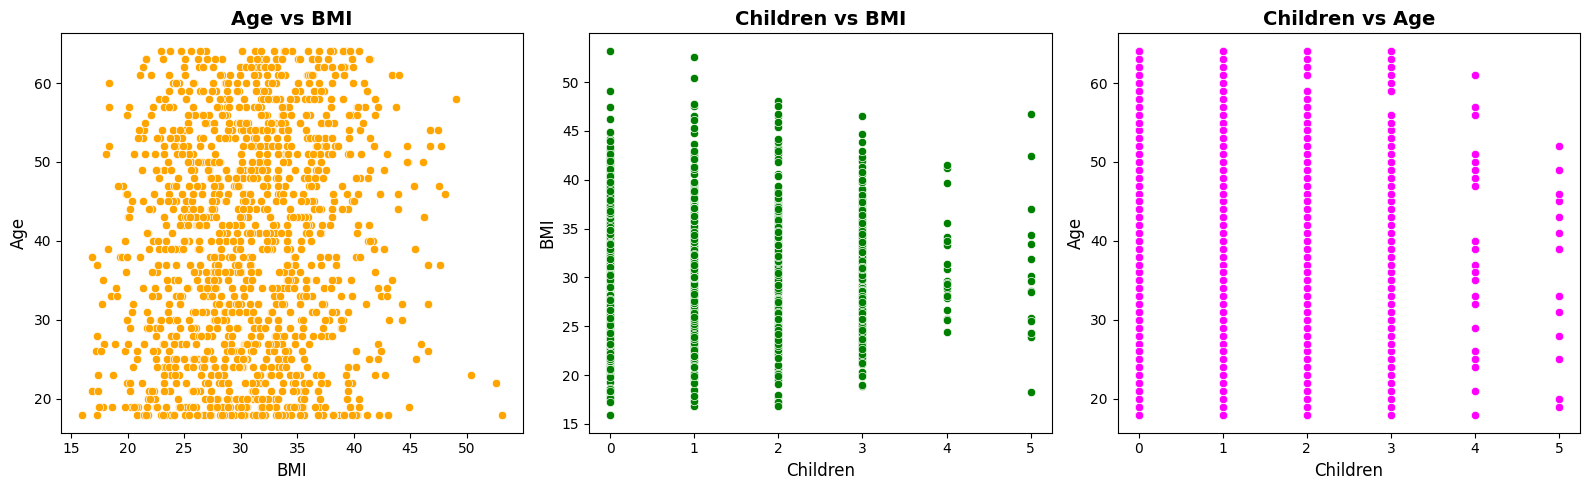

In [69]:
# Create a figure with 3 subplots in 1 row
fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharey=False)

# Scatter plot: age vs bmi
sns.scatterplot(data=df_for_bivariate_analysis, x='bmi', y='age', ax=axes[0], color='orange')
axes[0].set_title('Age vs BMI', fontsize=14, weight='bold')
axes[0].set_xlabel('BMI', fontsize=12, weight='normal')
axes[0].set_ylabel('Age', fontsize=12, weight='normal')

# Scatter plot: children vs bmi
sns.scatterplot(data=df_for_bivariate_analysis, x='children', y='bmi', ax=axes[1], color='green')
axes[1].set_title('Children vs BMI', fontsize=14, weight='bold')
axes[1].set_xlabel('Children', fontsize=12, weight='normal')
axes[1].set_ylabel('BMI', fontsize=12, weight='normal')

# Scatter plot: children vs age
sns.scatterplot(data=df_for_bivariate_analysis, x='children', y='age', ax=axes[2], color='magenta')
axes[2].set_title('Children vs Age', fontsize=14, weight='bold')
axes[2].set_xlabel('Children', fontsize=12, weight='normal')
axes[2].set_ylabel('Age', fontsize=12, weight='normal')

# Adjust layout
plt.tight_layout()
plt.show()


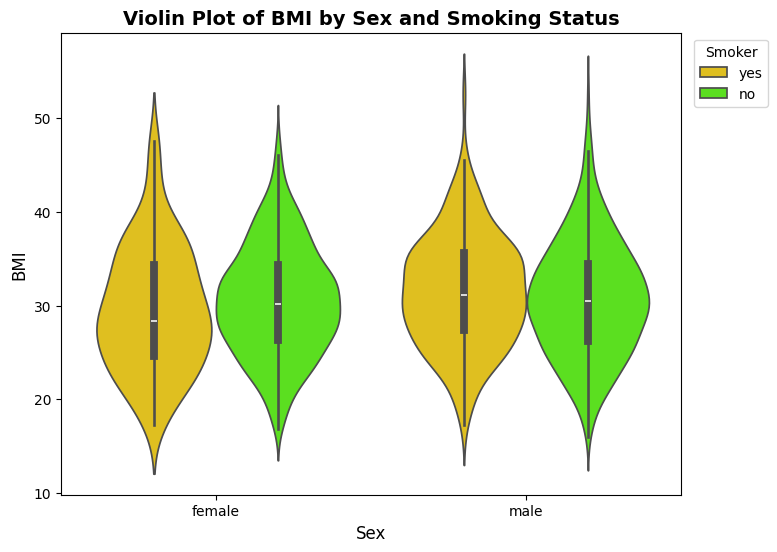

In [ ]:
# Generates 6 distinct colors
colors = sns.color_palette("hsv", 6)  
sns.set_palette(colors)

# Create a violin plot with hue to compare male and female
plt.figure(figsize=(8, 6))
sns.violinplot(data=df_for_bivariate_analysis, x='sex', y='bmi', hue='smoker')
plt.title('Violin Plot of BMI by Sex and Smoking Status', fontsize=14, weight='bold')
plt.xlabel('Sex', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.legend(title='Smoker', loc='upper left', bbox_to_anchor=(1.01, 1), fontsize=10)
plt.show()

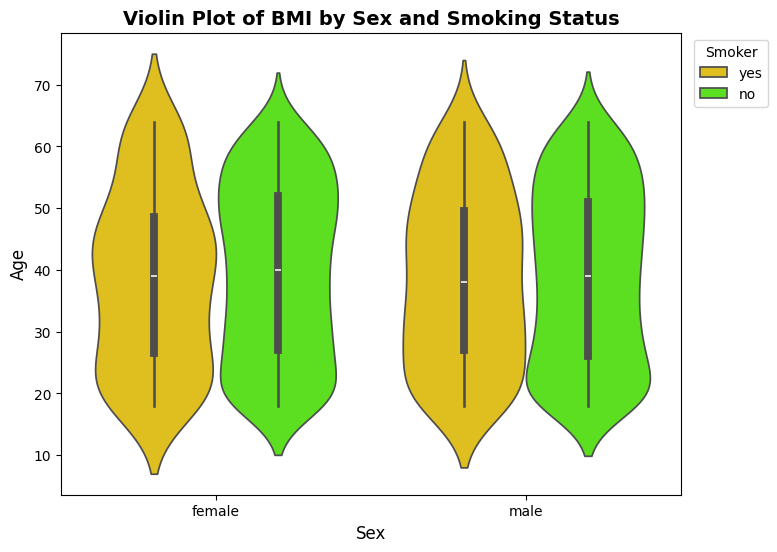

In [71]:
# Create a violin plot with hue to compare male and female
plt.figure(figsize=(8, 6))
sns.violinplot(data=df_for_bivariate_analysis, x='sex', y='age', hue='smoker')
plt.title('Violin Plot of BMI by Sex and Smoking Status', fontsize=14, weight='bold')
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.legend(title='Smoker', loc='upper left', bbox_to_anchor=(1.01, 1), fontsize=10)
plt.show()

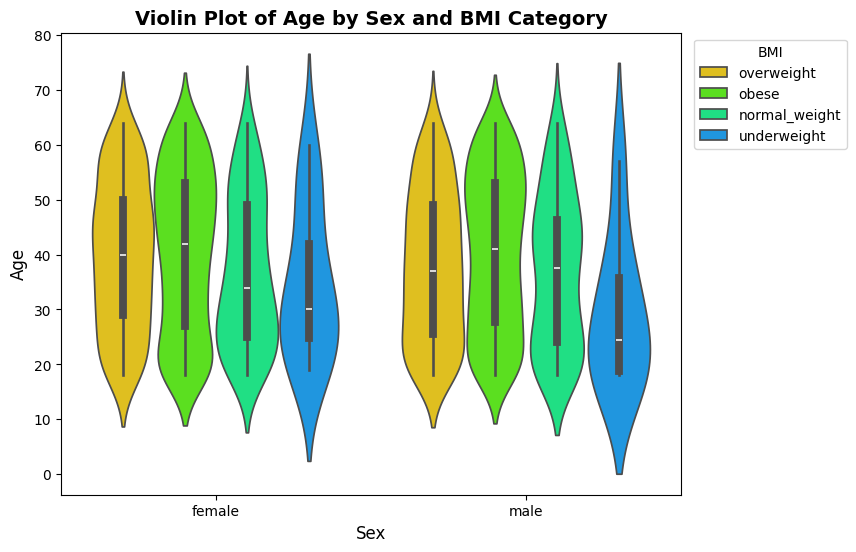

In [72]:
# Create a violin plot with hue to compare male and female
plt.figure(figsize=(8, 6))
sns.violinplot(data=df_for_bivariate_analysis, x='sex', y='age', hue='weight_category')
plt.title('Violin Plot of Age by Sex and BMI Category', fontsize=14, weight='bold')
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.legend(title='BMI', loc='upper left', bbox_to_anchor=(1.01, 1), fontsize=10)
plt.show()

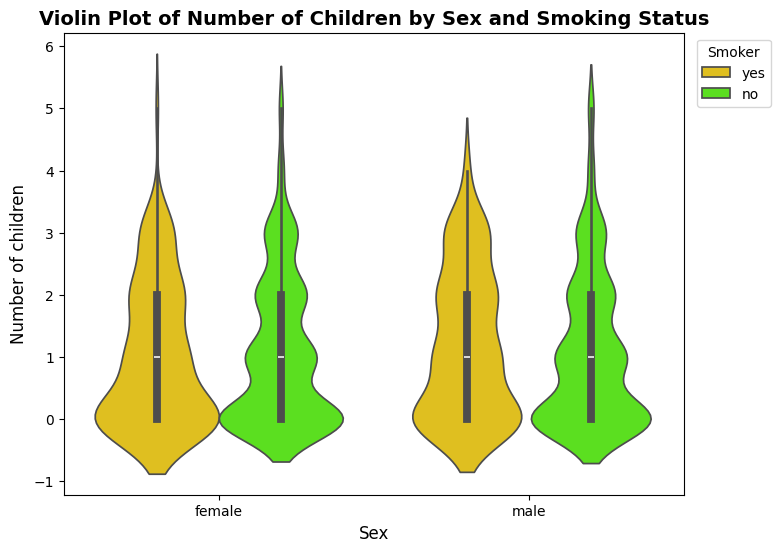

In [73]:
# Create a violin plot with hue to compare male and female
plt.figure(figsize=(8, 6))
sns.violinplot(data=df_for_bivariate_analysis, x='sex', y='children', hue='smoker')
plt.title('Violin Plot of Number of Children by Sex and Smoking Status', fontsize=14, weight='bold')
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Number of children', fontsize=12)
plt.legend(title='Smoker', loc='upper left', bbox_to_anchor=(1.01, 1), fontsize=10)
plt.show()

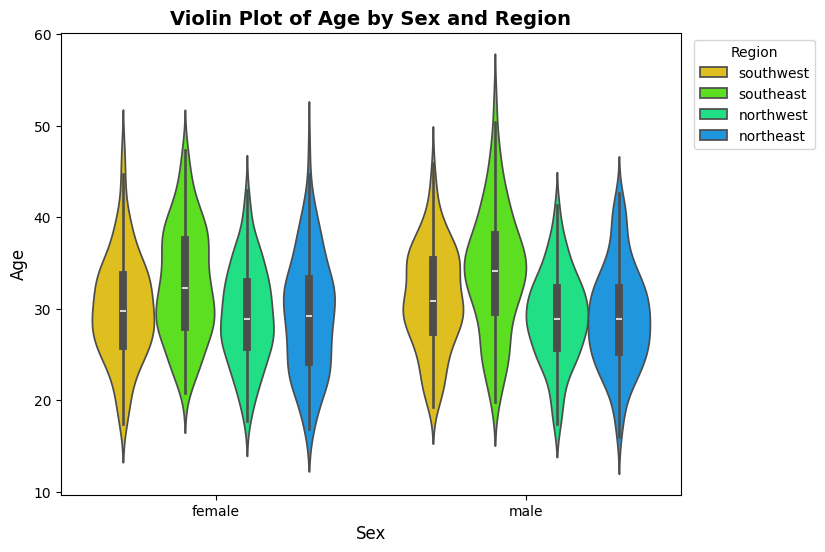

In [74]:
# Create a violin plot with hue to compare male and female
plt.figure(figsize=(8, 6))
sns.violinplot(data=df_for_bivariate_analysis, x='sex', y='bmi', hue='region')
plt.title('Violin Plot of Age by Sex and Region', fontsize=14, weight='bold')
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1.01, 1), fontsize=10)
plt.show()

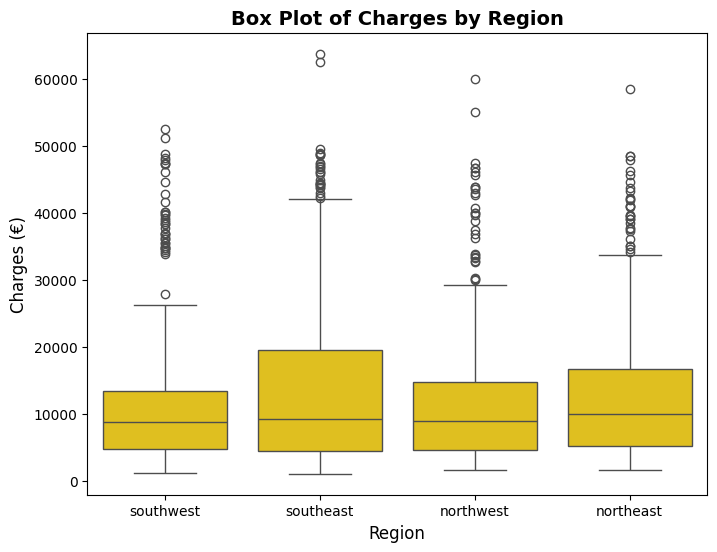

In [ ]:
# Create a box plot to compare charges across regions
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_for_bivariate_analysis, x='region', y='charges')
plt.title('Box Plot of Charges by Region', fontsize=14, weight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Charges (€)', fontsize=12)
plt.show()

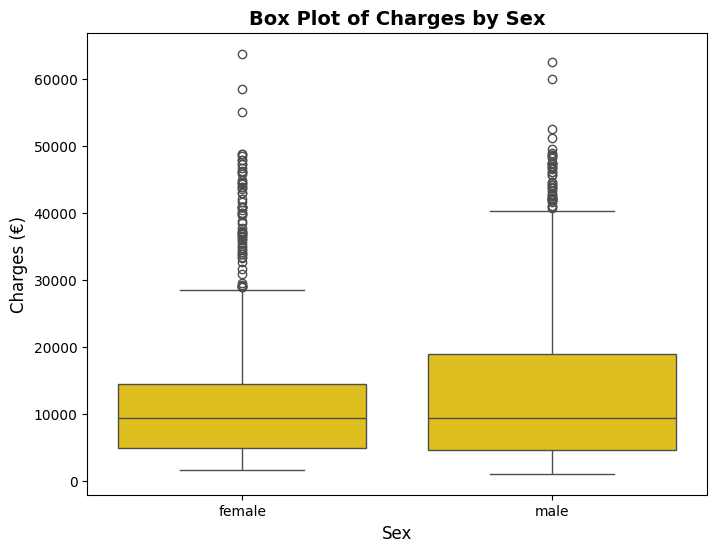

In [96]:
# Create a box plot to compare charges by sex
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_for_bivariate_analysis, x='sex', y='charges')
plt.title('Box Plot of Charges by Sex', fontsize=14, weight='bold')
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Charges (€)', fontsize=12)
plt.show()

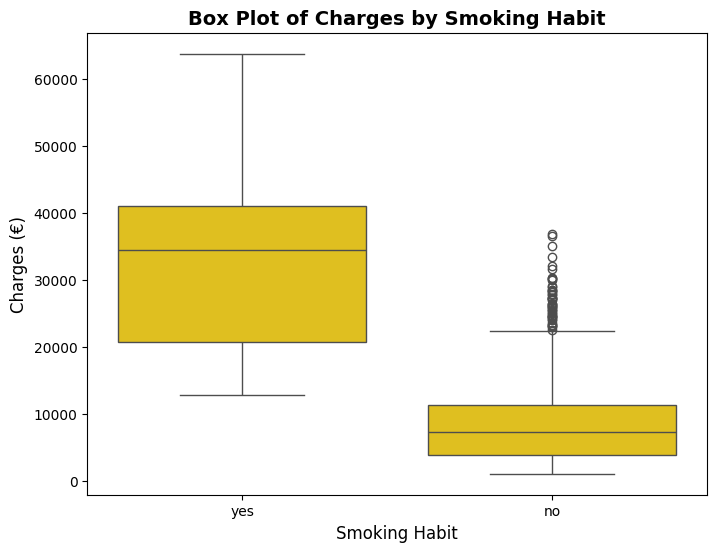

In [ ]:
# Create a box plot to compare charges by smoking habit
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_for_bivariate_analysis, x='smoker', y='charges')
plt.title('Box Plot of Charges by Smoking Habit', fontsize=14, weight='bold')
plt.xlabel('Smoking Habit', fontsize=12)
plt.ylabel('Charges (€)', fontsize=12)
plt.show()

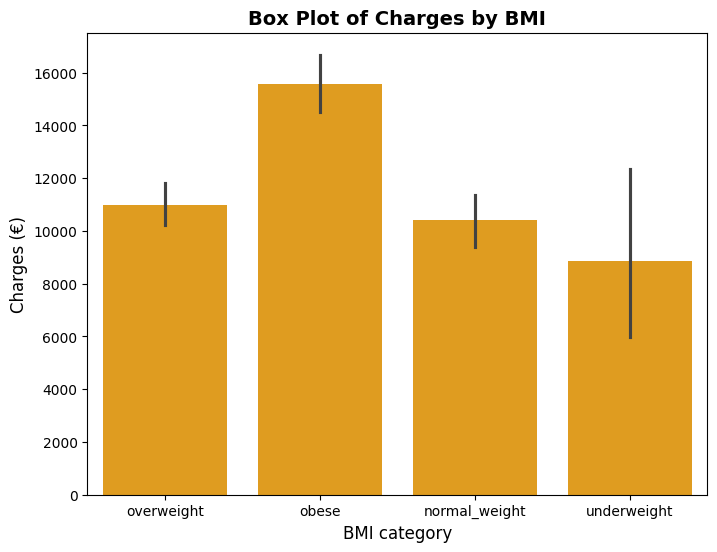

In [157]:
# Create a box plot to compare charges by BMI categoty
plt.figure(figsize=(8, 6))
sns.barplot(data=df_for_bivariate_analysis, x='weight_category', y='charges')
plt.title('Box Plot of Charges by BMI', fontsize=14, weight='bold')
plt.xlabel('BMI category', fontsize=12)
plt.ylabel('Charges (€)', fontsize=12)
plt.savefig("bmi_charge.png", dpi = 300,  bbox_inches = 'tight')
plt.show()

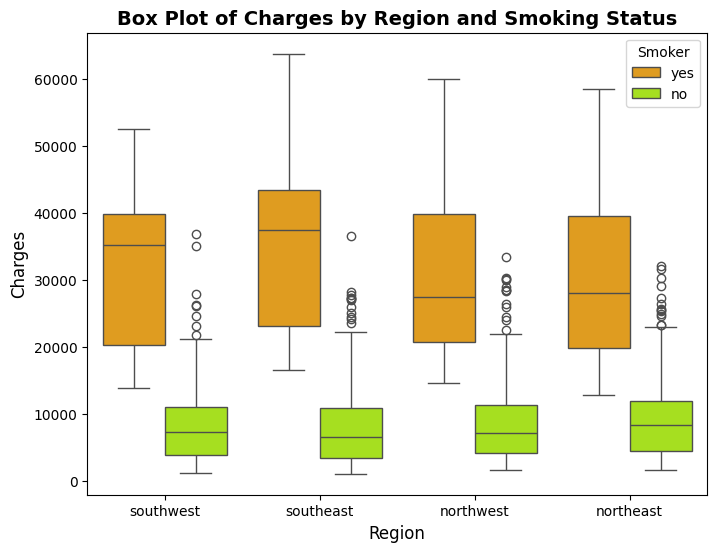

In [ ]:
# Create a box plot with hue to compare smokers and non-smokers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_for_bivariate_analysis, x='region', y='charges', hue='smoker')
plt.title('Box Plot of Charges by Region and Smoking Status', fontsize=14, weight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Charges', fontsize=12)
plt.legend(title='Smoker', fontsize=10)
# plt.savefig("smok_charge_region.png", dpi =300, bbox_inches = 'tight') # Save figure
plt.show()

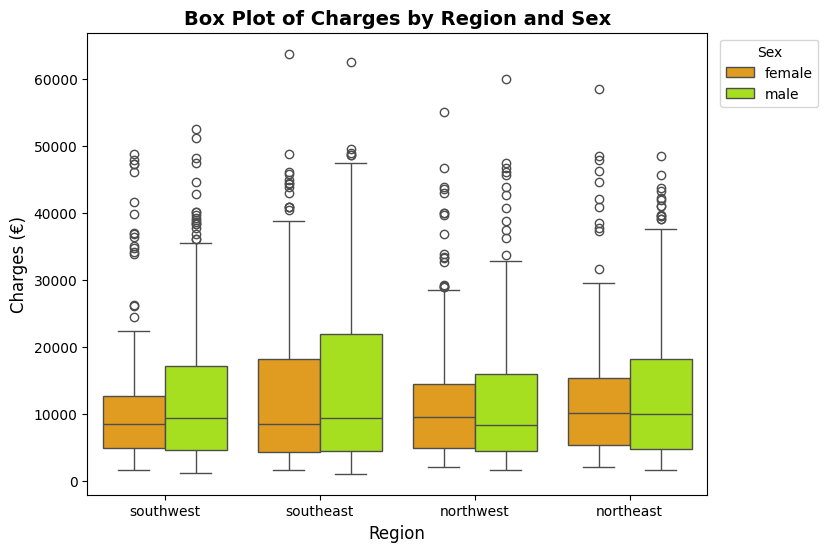

In [160]:
# Create a box plot with hue to compare male and female
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_for_bivariate_analysis, x='region', y='charges', hue='sex')
plt.title('Box Plot of Charges by Region and Sex', fontsize=14, weight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Charges (€)', fontsize=12)
plt.legend(title='Sex', loc='upper left', bbox_to_anchor=(1.01, 1), fontsize=10)
plt.show()

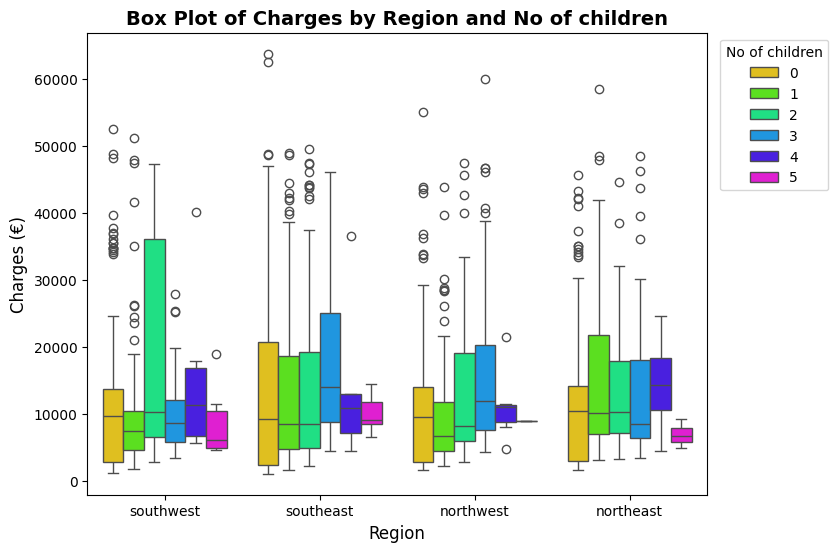

In [100]:
# Create a box plot with hue to compare male and female
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_for_bivariate_analysis, x='region', y='charges', hue='children', palette=colors)
plt.title('Box Plot of Charges by Region and No of children', fontsize=14, weight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Charges (€)', fontsize=12)
plt.legend(title='No of children', loc='upper left', bbox_to_anchor=(1.01, 1), fontsize=10)
plt.show()

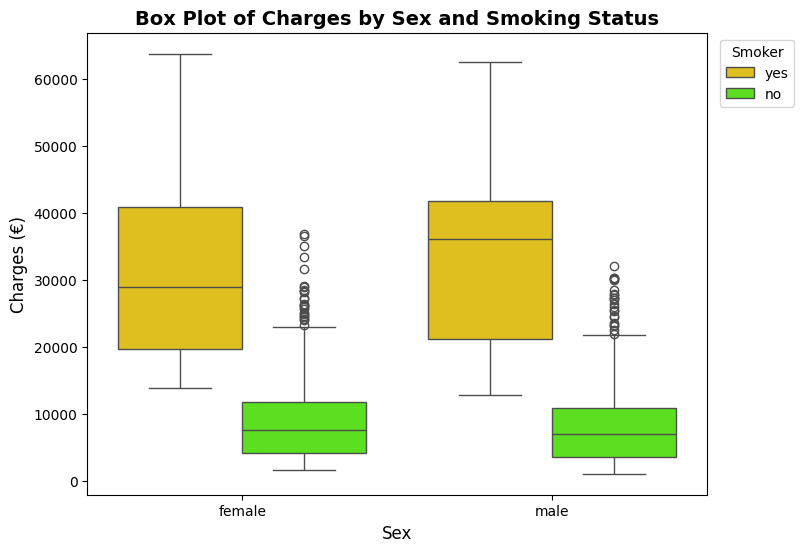

In [101]:
# Create a box plot with hue to compare male and female
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_for_bivariate_analysis, x='sex', y='charges', hue='smoker')
plt.title('Box Plot of Charges by Sex and Smoking Status', fontsize=14, weight='bold')
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Charges (€)', fontsize=12)
plt.legend(title='Smoker', loc='upper left', bbox_to_anchor=(1.01, 1), fontsize=10)
# Save figure
plt.savefig("Charges_by_sex_and_smoking.png", dpi=300, bbox_inches='tight') 
plt.show()

6. **Validation des hypothèses :** Utilisez des tests statistiques.

In [83]:
from scipy.stats import ttest_ind

# Hypotheses
# H0: Being a smoker does not affect charges
# H1: Being a smoker affects charges

# Divide charges into groups by smoking habit
smoker_charges = df_for_bivariate_analysis[df_for_bivariate_analysis['smoker'] == 'yes']['charges']
non_smoker_charges = df_for_bivariate_analysis[df_for_bivariate_analysis['smoker'] == 'no']['charges']

# Perform t-test
t_stat, p_value = ttest_ind(smoker_charges, non_smoker_charges)

# Results
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject H0: Being a smoker significantly affects charges.")
else:
    print("Fail to reject H0: No evidence that being a smoker affects charges.")


T-statistic: 46.644794583590944, P-value: 1.4067224646897303e-282
Reject H0: Being a smoker significantly affects charges.


In [84]:
from scipy.stats import f_oneway

# Hypotheses
# H0: Age does not affect charges
# H1: Age affects charges

# Divide charges into groups by age
young_adult_charges = df_for_cor[(df_for_cor['age'] >= 18) & (df_for_cor['age'] < 26)]['charges']
early_adulthood_charges = df_for_cor[(df_for_cor['age'] >= 26) & (df_for_cor['age'] < 36)]['charges']
mid_adulthood_charges = df_for_cor[(df_for_cor['age'] >= 36) & (df_for_cor['age'] < 46)]['charges']
late_adulthood_charges = df_for_cor[(df_for_cor['age'] >= 46) & (df_for_cor['age'] < 60)]['charges']

# Perform one-way ANOVA
f_stat, p_value = f_oneway(young_adult_charges, early_adulthood_charges, 
                           mid_adulthood_charges, late_adulthood_charges)

# Results
print(f"F-statistic: {f_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject H0: Age category significantly affects charges.")
else:
    print("Fail to reject H0: No evidence that Age category affects charges.")



F-statistic: 24.20372352121029, P-value: 3.2391330626472725e-15
Reject H0: Age category significantly affects charges.


In [85]:
# Hypotheses
# H0: BMI category does not affect charges
# H1: BMI category affects charges

# Divide charges into groups by BMI
underweight_charges = df_for_cor[df_for_cor['is_underweight'] == 1]['charges']
normal_charges = df_for_cor[df_for_cor['is_normal_weight'] == 1]['charges']
overweight_charges = df_for_cor[df_for_cor['is_overweight'] == 1]['charges']
obese_charges = df_for_cor[df_for_cor['is_obese'] == 1]['charges']

# Perform one-way ANOVA
f_stat, p_value = f_oneway(underweight_charges, normal_charges, overweight_charges, obese_charges)

# Results
print(f"F-statistic: {f_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject H0: BMI category significantly affects charges.")
else:
    print("Fail to reject H0: No evidence that BMI category affects charges.")

F-statistic: 18.87410801279046, P-value: 5.441262250136395e-12
Reject H0: BMI category significantly affects charges.


In [86]:
# Hypotheses
# H0: Number of children does not affect charges
# H1: Number of children of children affects charges

# Divide charges into groups by number of children
no_children_charges = df_for_cor[df_for_cor['children'] == 0]['charges']
one_child_charges = df_for_cor[df_for_cor['children'] == 1]['charges']
two_children_charges = df_for_cor[df_for_cor['children'] == 2]['charges']
three_children_charges = df_for_cor[df_for_cor['children'] == 3]['charges']
four_children_charges = df_for_cor[df_for_cor['children'] == 4]['charges']
five_children_charges = df_for_cor[df_for_cor['children'] == 5]['charges']

# Perform one-way ANOVA
f_stat, p_value = f_oneway(no_children_charges, one_child_charges, two_children_charges, three_children_charges,
                          four_children_charges, five_children_charges)

# Results
print(f"F-statistic: {f_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject H0: Number of children significantly affects charges.")
else:
    print("Fail to reject H0: No evidence that the number of children affects charges.")

F-statistic: 3.268734437423781, P-value: 0.006133447841740791
Reject H0: Number of children significantly affects charges.


In [87]:
# Hypotheses
# H0: Region does not affect charges
# H1: Region affects charges

# Divide charges into groups by number of children
southwest_charges = df_for_cor[df_for_cor['region'] == "southwest"]['charges']
southeast_charges = df_for_cor[df_for_cor['region'] == "southeast"]['charges']
northwest_charges = df_for_cor[df_for_cor['region'] == "northwest"]['charges']
northeast_charges = df_for_cor[df_for_cor['region'] == "northeast"]['charges']

# Perform one-way ANOVA
f_stat, p_value = f_oneway(southwest_charges, southeast_charges, northwest_charges, northeast_charges)

# Results
print(f"F-statistic: {f_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject H0: Region significantly affects charges.")
else:
    print("Fail to reject H0: No evidence that Region affects charges.")

F-statistic: 2.926140074755984, P-value: 0.032762872686469366
Reject H0: Region significantly affects charges.


In [88]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform post-hoc analysis by smoking habit
posthoc_smoker = pairwise_tukeyhsd(df_for_cor['charges'], df_for_cor['smoker'])

print(posthoc_smoker )

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
     0      1 23609.5716   0.0 22616.6226 24602.5206   True
-----------------------------------------------------------


In [89]:
# Categorize age category
def categorize_age(age):
    if 18 < age < 26:
        return 'young_adult'
    elif 26 <= age < 36:
        return 'early_adulthood'
    elif 36 <= age < 46:
        return 'mid_adulthood'
    else:
        return 'late_adulthood'

df_for_cor['age_category'] = df_for_cor['age'].apply(categorize_age)

In [90]:
# Perform post-hoc analysis by age
posthoc_age = pairwise_tukeyhsd(df_for_cor['charges'], df_for_cor['age_category'])

print(posthoc_age)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
     group1         group2      meandiff  p-adj    lower      upper    reject
-----------------------------------------------------------------------------
early_adulthood late_adulthood   5478.762    0.0  3223.4113  7734.1126   True
early_adulthood  mid_adulthood  2998.3222 0.0186   358.5811  5638.0633   True
early_adulthood    young_adult  -791.6112  0.877 -3509.0936  1925.8712  False
 late_adulthood  mid_adulthood -2480.4398 0.0255 -4747.3759  -213.5037   True
 late_adulthood    young_adult -6270.3732    0.0 -8627.3791 -3913.3672   True
  mid_adulthood    young_adult -3789.9334 0.0021 -6517.0387 -1062.8281   True
-----------------------------------------------------------------------------


In [91]:
# Perform post-hoc analysis by bmi
posthoc_bmi = pairwise_tukeyhsd(df_for_cor['charges'], df_for_cor['bmi_category'])

print(posthoc_bmi)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
    group1       group2    meandiff  p-adj     lower      upper    reject
-------------------------------------------------------------------------
normal_weight       obese  5162.7044    0.0   2824.3492  7501.0597   True
normal_weight  overweight    578.172  0.938  -1983.7444  3140.0884  False
normal_weight underweight -1557.1361 0.9433  -8684.1244  5569.8521  False
        obese  overweight -4584.5324    0.0  -6518.0342 -2651.0306   True
        obese underweight -6719.8406  0.061 -13645.8045   206.1233  False
   overweight underweight -2135.3082 0.8617  -9139.9128  4869.2964  False
-------------------------------------------------------------------------


In [92]:
# Perform post-hoc analysis by region
posthoc_region = pairwise_tukeyhsd(df_for_cor['charges'], df_for_cor['region'])

print(posthoc_region)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1    group2   meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------------
northeast northwest   -955.544 0.7457 -3397.7356 1486.6477  False
northeast southeast  1329.0269 0.4746 -1045.1238 3703.1775  False
northeast southwest -1059.4471 0.6793 -3499.7594 1380.8652  False
northwest southeast  2284.5708 0.0643   -89.5798 4658.7215  False
northwest southwest  -103.9031 0.9995 -2544.2155 2336.4092  False
southeast southwest  -2388.474 0.0477 -4760.6914  -16.2566   True
-----------------------------------------------------------------


In [93]:
# Perform post-hoc analysis by number of children
posthoc_children = pairwise_tukeyhsd(df_for_cor['charges'], df_for_cor['children'])

print(posthoc_children)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj     lower      upper   reject
------------------------------------------------------------
     0      1   346.4763 0.9985  -2045.7464  2738.699  False
     0      2  2688.8684 0.0439     42.6997 5335.0372   True
     0      3   2970.623 0.0693   -129.5755 6070.8214  False
     0      4  1465.9614 0.9914  -5565.7085 8497.6313  False
     0      5 -3598.6598 0.8137 -11836.9176 4639.5979  False
     1      2  2342.3921 0.2026   -588.6133 5273.3976  False
     1      3  2624.1466 0.2211   -722.4657  5970.759  False
     1      4  1119.4851 0.9978   -6024.251 8263.2212  False
     1      5 -3945.1361 0.7563 -12279.2512  4388.979  False
     2      3   281.7545 0.9999  -3250.8499 3814.3589  False
     2      4  -1222.907 0.9968  -8455.6413 6009.8272  False
     2      5 -6287.5283 0.2706 -14698.0547 2122.9981  False
     3      4 -1504.6615 0.9924  -8915.5634 5906.2403  False
     3      5 -6569.2828